In [152]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

## Generate target function and its noisy version.

In [222]:
# Sets the number of examples.
M = 20

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

# Create target function and its noisy version.
x = np.sort(3*np.random.rand(M, 1), axis=0)
y = 1 + 0.5*x
y_noisy = y + np.random.randn(M, 1)/1.5

Mtest = 100
x_test = np.linspace(0, 3, Mtest).reshape(Mtest, 1)
y_test = 1 + 0.5*x_test + np.random.randn(Mtest, 1)/1.5

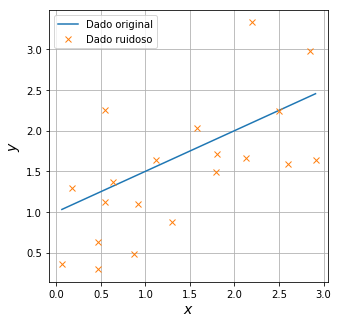

In [223]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
#plt.plot(x_test, y_test, 'o', label='Dado teste')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.savefig("target_function.png", dpi=600)
#Show the plot.
plt.show()

## Define the polinomial order

In [224]:
# Polynomial order.
model_order = 10

## Define the regularization factor

In [229]:
# Regularization factor.
lambdas = [0, 3.15*10**-2, 1]

## SciKit-Learn solution

Lambda: 0.0000e+00:
[1.50467735]
[[ 1.20259193e+02 -2.89207009e+03  2.96777591e+04 -1.65681150e+05
   5.55066651e+05 -1.16464184e+06  1.54152762e+06 -1.24951698e+06
   5.66116717e+05 -1.09776151e+05]]
---------------------------------------------
Lambda: 3.1500e-02:
[1.50467735]
[ 0.49174422  0.          0.          0.         -0.         -0.
 -0.         -0.         -0.00773711 -0.00664474]
---------------------------------------------
Lambda: 1.0000e+00:
[1.50467735]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
---------------------------------------------


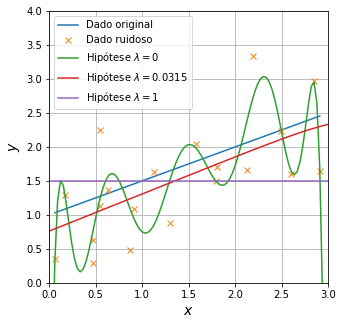

In [230]:
include_bias = False

# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
for i in range(0,len(lambdas)):

    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    std_scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x, y_noisy)
    # Print coefs
    print('Lambda: %1.4e:' % (lambdas[i]))
    print(model.named_steps['reg'].intercept_)
    print(model.named_steps['reg'].coef_)
    print('---------------------------------------------')
    # Predict.
    y_test_regul = model.predict(x_test)
    # Plot prediction.
    plt.plot(x_test, y_test_regul, label='Hipótese $\lambda=$'+str(lambdas[i]))
    
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
plt.axis([0, 3, 0, 4])
# Save figure
plt.savefig("lasso_regression.png", dpi=600)
#Show the plot.
plt.show()

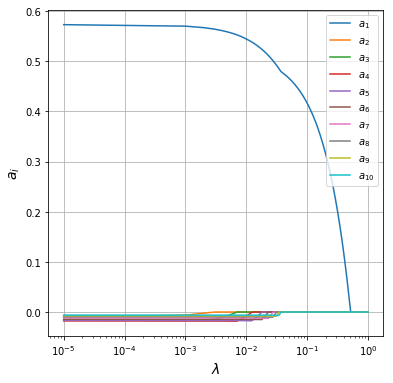

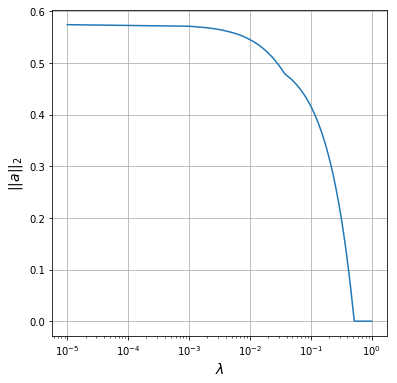

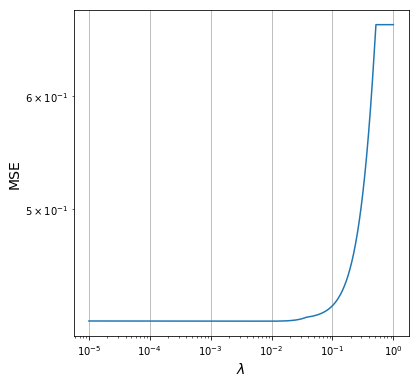

In [204]:
include_bias = False

N = 1000
lambdas = np.linspace(1e-5,1, N)

a_hist = np.zeros((model_order, N)) if include_bias == False else np.zeros((model_order+1, N))
norm_hist = np.zeros((1, N))
error_test = []

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    std_scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x, y_noisy)
    a = model.named_steps['reg'].coef_
    a_hist[:,i] = a
    norm_hist[:,i] = np.linalg.norm(a)
    # Predict.
    y_test_regul = model.predict(x_test)
    error_test.append((mean_squared_error(y_test, y_test_regul)))

# Plot weight.
fig = plt.figure(figsize=(6,6))
for i in range(0,model_order): plt.plot(lambdas, a_hist[i,:], label='$a_{'+str(i+1)+'}$')
plt.xscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('$a_i$', fontsize=14)
plt.legend(loc='upper right')
plt.grid()
# Save figure
plt.savefig("lasso_regression_pesos.png", dpi=600)
#Show the plot.
plt.show()

# Plot norm.
fig = plt.figure(figsize=(6,6))
plt.plot(lambdas, norm_hist[0,:])
plt.xscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('$||a||_2$', fontsize=14)
plt.grid()
# Save figure
plt.savefig("lasso_regression_norma.png", dpi=600)
#Show the plot.
plt.show()

# Plot error.
fig = plt.figure(figsize=(6,6))
plt.plot(lambdas, error_test)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.grid()
# Save figure
plt.savefig("lasso_regression_mse.png", dpi=600)
#Show the plot.
plt.show()

In [187]:
for i in range(0, N):
    print('lambda %1.2e: %1.2e, %1.2e, %1.2e, %1.2e, %1.2e' % (lambdas[i],a_hist[0,i],a_hist[1,i],a_hist[2,i],a_hist[3,i],a_hist[4,i]))


lambda 1.00e-05: 5.73e-01, -9.99e-03, -1.54e-02, -1.77e-02, -1.66e-02
lambda 1.01e-03: 5.70e-01, -6.17e-03, -1.55e-02, -1.77e-02, -1.66e-02
lambda 2.01e-03: 5.67e-01, -2.34e-03, -1.56e-02, -1.78e-02, -1.66e-02
lambda 3.01e-03: 5.64e-01, -0.00e+00, -1.43e-02, -1.78e-02, -1.66e-02
lambda 4.01e-03: 5.61e-01, 0.00e+00, -1.06e-02, -1.80e-02, -1.67e-02
lambda 5.01e-03: 5.58e-01, 0.00e+00, -7.02e-03, -1.81e-02, -1.68e-02
lambda 6.02e-03: 5.55e-01, 0.00e+00, -3.44e-03, -1.82e-02, -1.68e-02
lambda 7.02e-03: 5.53e-01, 0.00e+00, -0.00e+00, -1.82e-02, -1.69e-02
lambda 8.02e-03: 5.50e-01, 0.00e+00, -0.00e+00, -1.48e-02, -1.70e-02
lambda 9.02e-03: 5.47e-01, 0.00e+00, -0.00e+00, -1.14e-02, -1.71e-02
lambda 1.00e-02: 5.44e-01, 0.00e+00, 0.00e+00, -8.01e-03, -1.72e-02
lambda 1.10e-02: 5.42e-01, 0.00e+00, 0.00e+00, -4.67e-03, -1.74e-02
lambda 1.20e-02: 5.39e-01, 0.00e+00, 0.00e+00, -1.32e-03, -1.75e-02
lambda 1.30e-02: 5.36e-01, 0.00e+00, 0.00e+00, -0.00e+00, -1.56e-02
lambda 1.40e-02: 5.34e-01, 0.00e+0